In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from file_utils import read_from_pickle

## Loading testing data

In [2]:
MODEL_DIR = './models/vaccination_tweets'
TRAINING_SIZE_PCT = 'full'
X_test = read_from_pickle('{}/train-{}.pkl'.format(MODEL_DIR, TRAINING_SIZE_PCT))
kmeans = read_from_pickle('{}/kmeans-{}.pkl'.format(MODEL_DIR, TRAINING_SIZE_PCT))

centroids = kmeans.cluster_centers_
n_clusters = len(centroids)

print('X_test samples: {}'.format(len(X_test)))
print('Kmeans n_clusters {} features {}'.format(n_clusters, kmeans.n_features_in_))

X_test samples: 10920
Kmeans n_clusters 3 features 4726


## Make cluster prediction

In [3]:
clusterN = kmeans.predict(X_test)

## Distribution of clusters

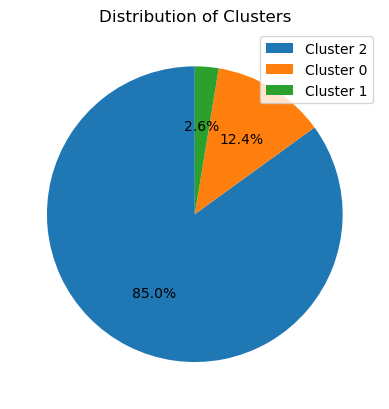

In [4]:
cluster_counts = pd.DataFrame(data={ 'clusterN': clusterN}).value_counts()
plt.figure().set_figwidth(8)
plt.title('Cluster frequency')
plt.pie(cluster_counts, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.legend(labels=['Cluster {}'.format(c[0]) for c in cluster_counts.index], )
plt.show()

## Data Points and Centroids

In [5]:
def plot_pca_scatter(data, clusterN, centroids):
    pca = PCA(n_components=2)
    centroids_2d = pca.fit_transform(centroids)
    data2d = pca.transform(data)
    fig = plt.figure(figsize=(10,10))
    norm = plt.Normalize(0, len(centroids)-1)
    ax = fig.add_subplot()
    for i in range(len(data)):
        ax.scatter(data2d[i, 0], data2d[i, 1], color=plt.cm.viridis(norm(clusterN[i])), s=20, edgecolors='none', alpha=.7)
    ax.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='X', s=150, linewidths=3, color='r', label='Centroids')
    return ax

def plot_pca_3d_scatter(data, clusterN, centroids):
    pca = PCA(n_components=3)
    centroids_3d = pca.fit_transform(centroids)
    data3d = pca.transform(data)
    fig = plt.figure(figsize=(10,10))
    norm = plt.Normalize(0, len(centroids)-1)
    ax = fig.add_subplot(projection='3d')
    for i in range(len(data)):
        ax.scatter(data3d[i, 0], data3d[i, 1], data3d[i, 2], color=plt.cm.viridis(norm(clusterN[i])), s=20, edgecolors='none', alpha=.7)
    ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2], marker='X', s=150, linewidths=3, color='r', label='Centroids')
    return ax

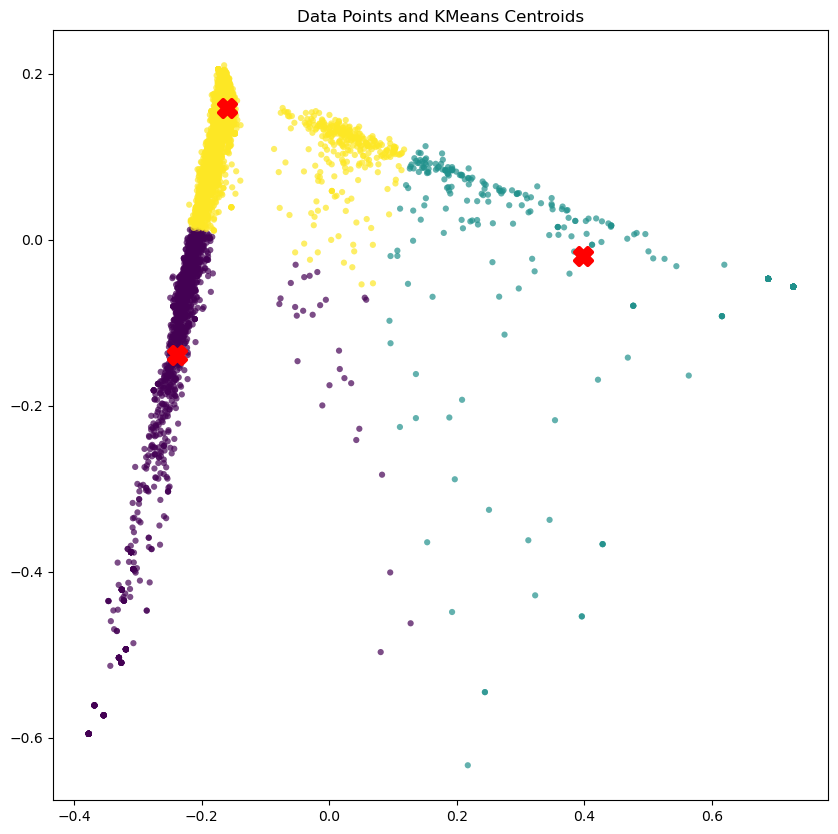

In [6]:
plot_pca_scatter(X_test, clusterN, centroids)
plt.title('Data Points and KMeans Centroids')
plt.show()

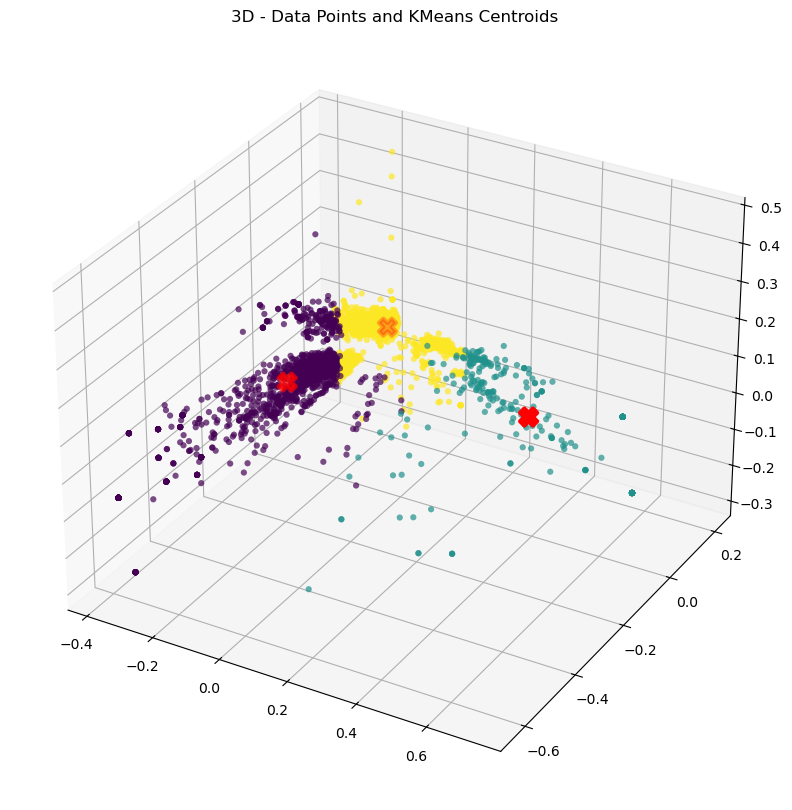

In [7]:
plot_pca_3d_scatter(X_test, clusterN, centroids)
plt.title('3D - Data Points and KMeans Centroids')
plt.show()